<a href="https://colab.research.google.com/github/renatachavezm22/Valores_Atipicos_ACT/blob/main/Actividad_3_1_Valores_atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3.1 Valores atipicos**

Descargamos la base de datos sin los valores nulos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving Ventas_totales_SN.csv to Ventas_totales_SN.csv


{'Ventas_totales_SN.csv': b',indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros\n0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309\n1,01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.9,2600083.591,1026166.544,328288.6951

In [4]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_totales_SN.csv') 

In [5]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

Comprobamos que tenemos la base de datos sin valores nulos por lo cual proseguimos al analisis.

## **Metodos para la eliminación de outliers**

Desviación estandar para Ventas de Precios Corrientes

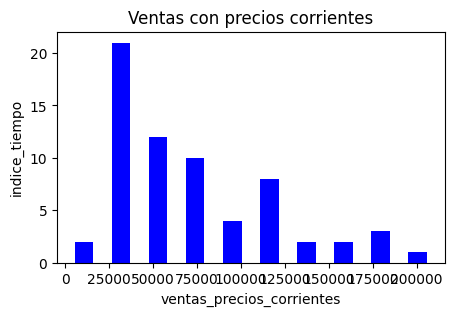

In [6]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=data["ventas_precios_corrientes"], color='blue', rwidth=0.50)
plt.title('Ventas con precios corrientes')
plt.xlabel('ventas_precios_corrientes')
plt.ylabel('indice_tiempo')

plt.show() #dibujamos el histograma

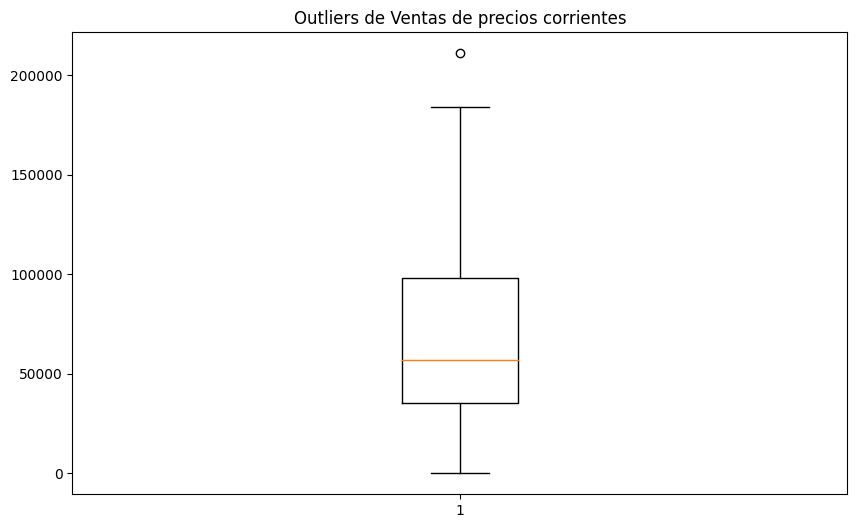

In [7]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data["ventas_precios_corrientes"]) 
plt.title("Outliers de Ventas de precios corrientes")
plt.show() #dibujamos el diagrama

In [8]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data["ventas_precios_corrientes"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)
print()

Limite superior permitido 166955.1488112687
Limite inferior permitido -22474.751888191793



In [9]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5116430.634,1.839832e+08,56640033.15,55432191.37,...,45199914.72,5859939.041,1.627522e+07,2.126505e+07,5863700.608,1.679029e+06,21753939.73,4759532.634,1.266927e+07,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4144283.743,1.771481e+08,53189998.68,50063972.79,...,49991675.91,6746166.557,1.930946e+07,2.287784e+07,6510665.781,1.719459e+06,23131265.85,4228053.874,1.089879e+07,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,1.796392e+08,1.753585e+08,4280751.113,1.796392e+08,52738110.62,49886787.86,...,50150351.46,6667329.665,2.012112e+07,2.284153e+07,6314109.470,1.779483e+06,23578638.71,5213152.564,1.203960e+07,1.234998e+07


In [10]:
data_clean= data[(y<=Limite_Superior)&(y>Limite_Inferior)]
data_clean

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07


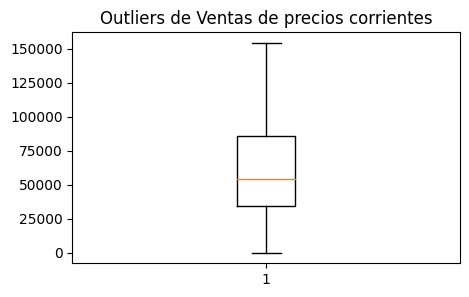

In [11]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["ventas_precios_corrientes"]) 
plt.title("Outliers de Ventas de precios corrientes")
plt.show() #dibujamos el diagrama

Considerando que no tuve outliers decidí usar dos desviaciones estandar en la parte de la analítica.

Rango Intercuartílico para Ventas de Precios Corrientes

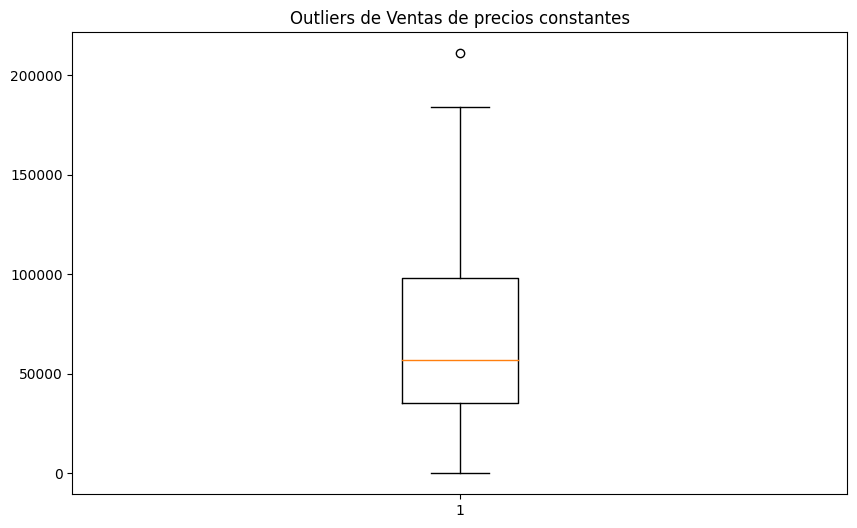

In [12]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data["ventas_precios_corrientes"]) 
plt.title("Outliers de Ventas de precios constantes")
plt.show() #dibujamos el diagrama

In [13]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["ventas_precios_corrientes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 192319.35000000003
Limite inferior permitido -59178.650000000016


In [14]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5116430.634,1.839832e+08,56640033.15,55432191.37,...,45199914.72,5859939.041,1.627522e+07,2.126505e+07,5863700.608,1.679029e+06,21753939.73,4759532.634,1.266927e+07,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4144283.743,1.771481e+08,53189998.68,50063972.79,...,49991675.91,6746166.557,1.930946e+07,2.287784e+07,6510665.781,1.719459e+06,23131265.85,4228053.874,1.089879e+07,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,1.796392e+08,1.753585e+08,4280751.113,1.796392e+08,52738110.62,49886787.86,...,50150351.46,6667329.665,2.012112e+07,2.284153e+07,6314109.470,1.779483e+06,23578638.71,5213152.564,1.203960e+07,1.234998e+07


In [15]:
#Obtenemos datos limpios
data_clean_iqr1= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr1

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,4.634783e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.089879e+07,1.191048e+07


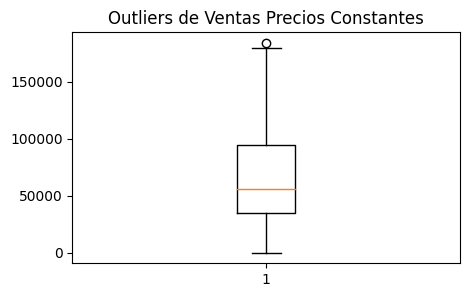

In [16]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr1["ventas_precios_corrientes"]) 
plt.title("Outliers de Ventas Precios Constantes")
plt.show() #dibujamos el diagrama

Considerando el comportamiento de la variable de ventas precio corrientes veo que no tuve que hacerle cambios al modelo de IQR por lo cual decidi hacer todas las variables con el modelo de IQR (Rango Intercuartílico) y en algunos usaré él de desviación estandar con 3 en la fórmula.

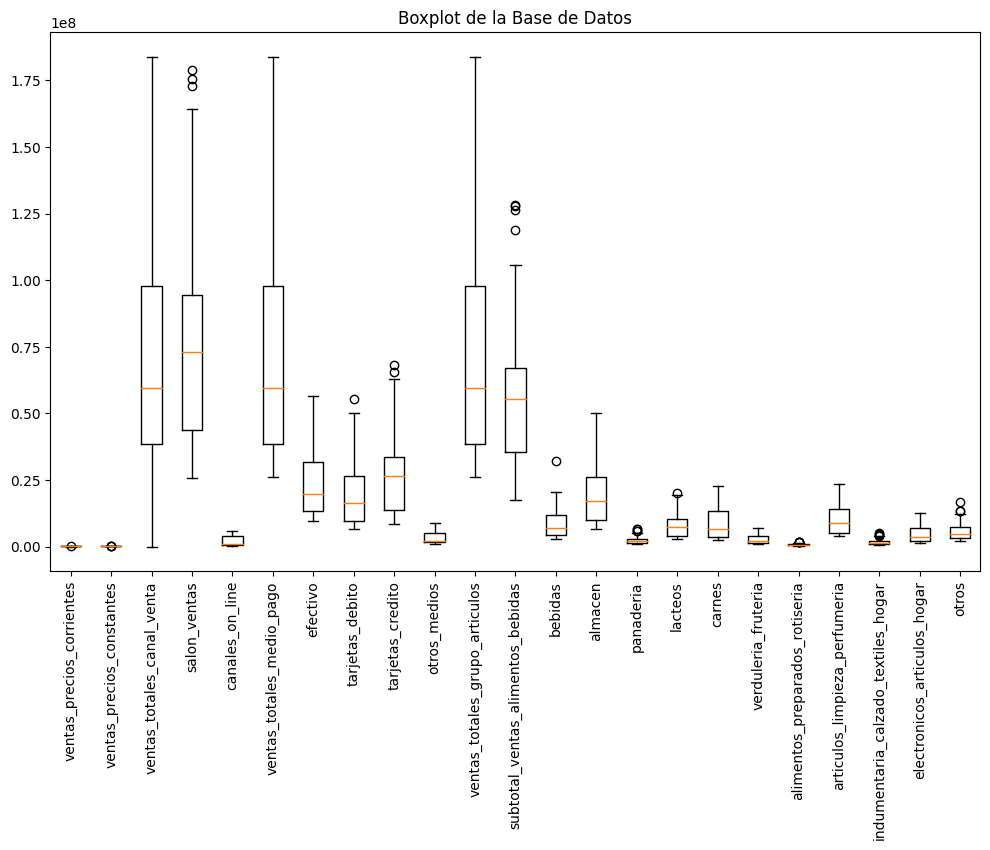

In [17]:
#Box plot de todas las variables
df=data.drop(['Unnamed: 0', 'indice_tiempo'], axis=1)

fig = plt.figure(figsize =(12, 7))
plt.boxplot(df, labels=df.columns) 
plt.xticks(rotation = 90)
plt.title("Boxplot de la Base de Datos")
plt.show() #dibujamos el diagrama

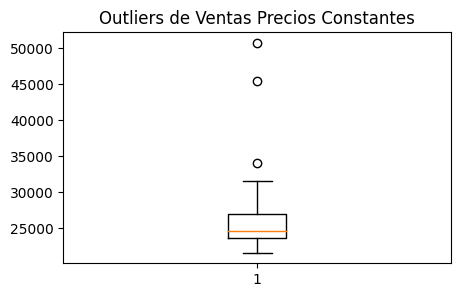

In [18]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["ventas_precios_constantes"]) 
plt.title("Outliers de Ventas Precios Constantes")
plt.show() #dibujamos el diagrama

In [19]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["ventas_precios_constantes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 31938.75
Limite inferior permitido 18759.949999999997


In [20]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5116430.634,1.839832e+08,56640033.15,55432191.37,...,45199914.72,5859939.041,1.627522e+07,2.126505e+07,5863700.608,1.679029e+06,21753939.73,4759532.634,1.266927e+07,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4144283.743,1.771481e+08,53189998.68,50063972.79,...,49991675.91,6746166.557,1.930946e+07,2.287784e+07,6510665.781,1.719459e+06,23131265.85,4228053.874,1.089879e+07,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,1.796392e+08,1.753585e+08,4280751.113,1.796392e+08,52738110.62,49886787.86,...,50150351.46,6667329.665,2.012112e+07,2.284153e+07,6314109.470,1.779483e+06,23578638.71,5213152.564,1.203960e+07,1.234998e+07


In [21]:
#Obtenemos datos limpios
data_clean_iqr2= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr2

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,5.664003e+07,5.543219e+07,...,4.519991e+07,5.859939e+06,1.627522e+07,2.126505e+07,5.863701e+06,1.679029e+06,2.175394e+07,4.759533e+06,1.266927e+07,1.666512e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,4.634783e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.089879e+07,1.191048e+07


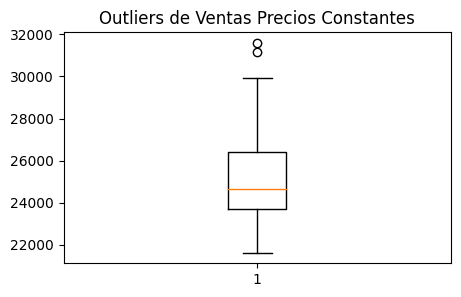

In [22]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr2["ventas_precios_constantes"]) 
plt.title("Outliers de Ventas Precios Constantes")
plt.show() #dibujamos el diagrama

### ventas_totales_canal_venta

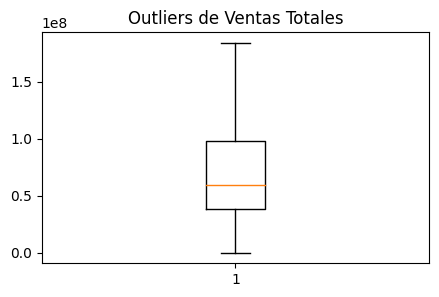

In [23]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["ventas_totales_canal_venta"]) 
plt.title("Outliers de Ventas Totales")
plt.show() #dibujamos el diagrama

Considerando que en esta columna no tenemos outliers no es necesario hacer el procedimiento de desviación o de cuartiles.

### salon_ventas                           


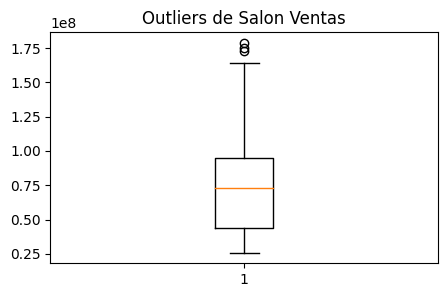

In [24]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["salon_ventas"]) 
plt.title("Outliers de Salon Ventas")
plt.show() #dibujamos el diagrama

In [25]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["salon_ventas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 170440082.58499998
Limite inferior permitido -32001350.254999995


In [26]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5116430.634,1.839832e+08,56640033.15,55432191.37,...,45199914.72,5859939.041,1.627522e+07,2.126505e+07,5863700.608,1.679029e+06,21753939.73,4759532.634,1.266927e+07,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4144283.743,1.771481e+08,53189998.68,50063972.79,...,49991675.91,6746166.557,1.930946e+07,2.287784e+07,6510665.781,1.719459e+06,23131265.85,4228053.874,1.089879e+07,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,1.796392e+08,1.753585e+08,4280751.113,1.796392e+08,52738110.62,49886787.86,...,50150351.46,6667329.665,2.012112e+07,2.284153e+07,6314109.470,1.779483e+06,23578638.71,5213152.564,1.203960e+07,1.234998e+07


In [27]:
#Obtenemos datos limpios
data_clean_iqr3= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr3

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07


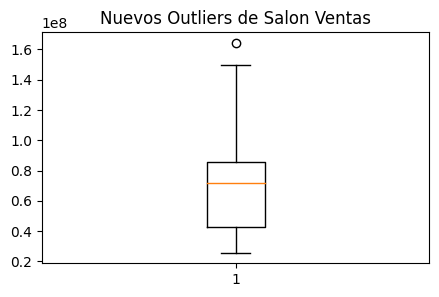

In [28]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr3["salon_ventas"]) 
plt.title("Nuevos Outliers de Salon Ventas")
plt.show() #dibujamos el diagrama

Como vemos el número de outliers bajo en 4 cifras como vemos en losss outliers y en el box plot previo.

### canales_on_line

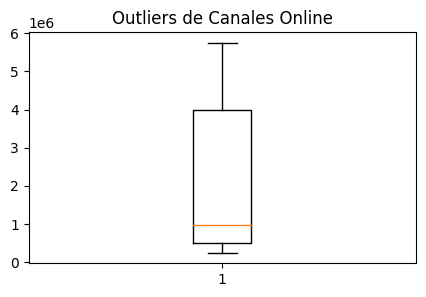

In [29]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["canales_on_line"]) 
plt.title("Outliers de Canales Online")
plt.show() #dibujamos el diagrama

Como vemos en canales online no tenemos outliers 

### ventas_totales_medio_pago

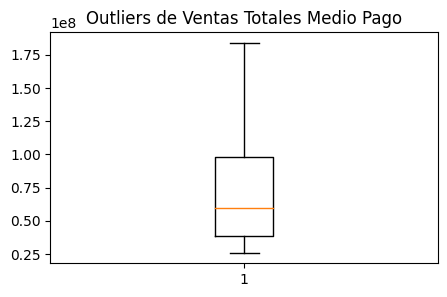

In [30]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["ventas_totales_medio_pago"]) 
plt.title("Outliers de Ventas Totales Medio Pago")
plt.show() #dibujamos el diagrama

### efectivo

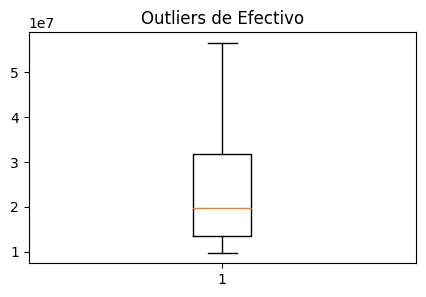

In [31]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["efectivo"]) 
plt.title("Outliers de Efectivo")
plt.show() #dibujamos el diagrama

### tarjetas_debito

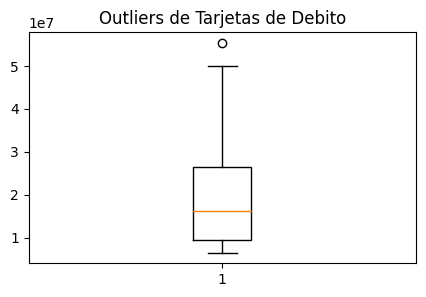

In [32]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["tarjetas_debito"]) 
plt.title("Outliers de Tarjetas de Debito")
plt.show() #dibujamos el diagrama

In [33]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data["tarjetas_debito"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)
print()

Limite superior permitido 45940540.93141902
Limite inferior permitido -5584345.077542104



In [34]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4.819480e+06,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,12187552.35,13433071.98
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [35]:
data_clean1= data[(y<=Limite_Superior)&(y>Limite_Inferior)]
data_clean1

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
5,5,01/06/2017,29132.7,26365.4,2.913271e+07,2.876387e+07,3.688473e+05,2.913271e+07,1.056549e+07,7.337457e+06,...,7.911936e+06,1.083494e+06,3.322050e+06,2.883229e+06,9.522033e+05,3.451141e+05,4.277890e+06,1.001572e+06,1.893542e+06,2.358093e+06
6,6,01/07/2017,31182.3,27819.4,3.118230e+07,3.081531e+07,3.669907e+05,3.118230e+07,1.090591e+07,8.183012e+06,...,8.482568e+06,1.153102e+06,3.534097e+06,3.013144e+06,9.943436e+05,3.800082e+05,4.599798e+06,1.026743e+06,1.995091e+06,2.678009e+06
7,7,01/08/2017,31154.9,27394.1,3.115488e+07,3.076336e+07,3.915251e+05,3.115488e+07,1.104163e+07,7.899351e+06,...,8.275620e+06,1.147970e+06,3.604272e+06,2.946951e+06,1.060479e+06,3.701912e+05,4.585004e+06,7.864155e+05,1.882134e+06,3.234640e+06
8,8,01/09/2017,30521.5,26404.3,3.052151e+07,3.013560e+07,3.859105e+05,3.052151e+07,1.078917e+07,7.888243e+06,...,8.319868e+06,1.144159e+06,3.640337e+06,2.991425e+06,1.078616e+06,3.625737e+05,4.708172e+06,7.405727e+05,1.673424e+06,4.634783e+06
9,9,01/10/2017,32446.0,27766.7,3.244598e+07,3.198022e+07,4.657591e+05,3.244598e+07,1.122031e+07,8.695477e+06,...,8.319868e+06,1.171283e+06,3.698963e+06,3.091847e+06,1.147860e+06,3.811761e+05,4.889144e+06,8.704811e+05,2.404158e+06,2.538297e+06


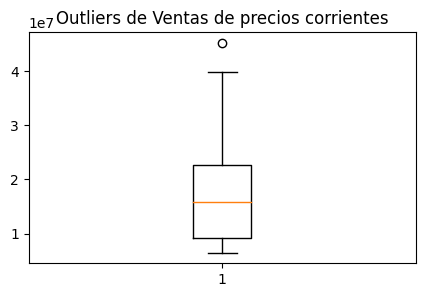

In [36]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean1["tarjetas_debito"]) 
plt.title("Outliers de Ventas de precios corrientes")
plt.show() #dibujamos el diagrama

### tarjetas_credito

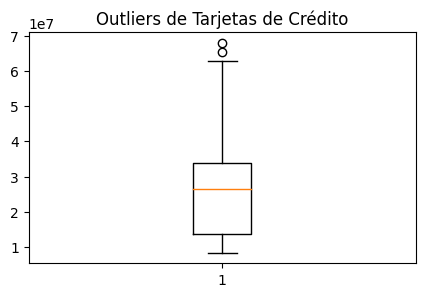

In [37]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["tarjetas_credito"]) 
plt.title("Outliers de Tarjetas de Crédito")
plt.show() #dibujamos el diagrama

In [38]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data["tarjetas_credito"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)
print()

Limite superior permitido 57200262.84209584
Limite inferior permitido -2868872.154157374



In [39]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [40]:
data_clean2= data[(y<=Limite_Superior)&(y>Limite_Inferior)]
data_clean2

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07


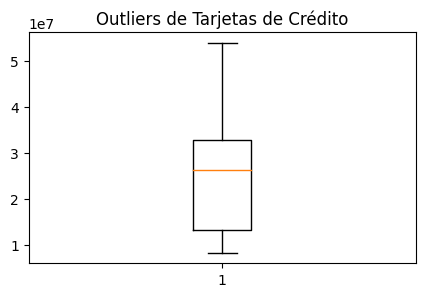

In [41]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean2["tarjetas_credito"]) 
plt.title("Outliers de Tarjetas de Crédito")
plt.show() #dibujamos el diagrama

Como vemos en las dos partes al momento de usar 2 desviaciones estandar no me daba outliers pero considerando que en la gráfica vemos que si existen es quue decidimos usar ese número de desviaciones y limpiarla.

### otros_medios

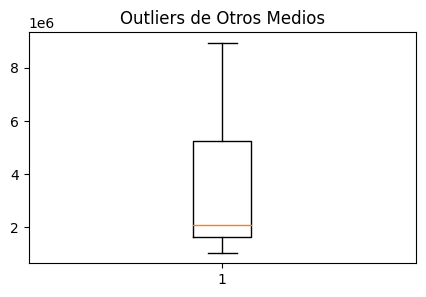

In [42]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["otros_medios"]) 
plt.title("Outliers de Otros Medios")
plt.show() #dibujamos el diagrama

### ventas_totales_grupo_articulos

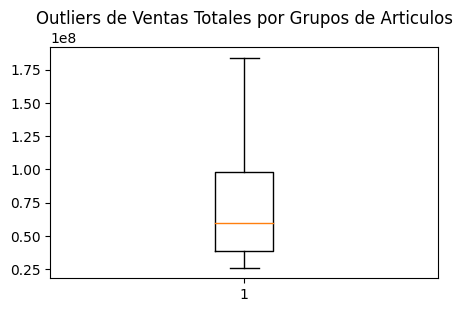

In [43]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["ventas_totales_grupo_articulos"]) 
plt.title("Outliers de Ventas Totales por Grupos de Articulos")
plt.show() #dibujamos el diagrama

### subtotal_ventas_alimentos_bebidas 

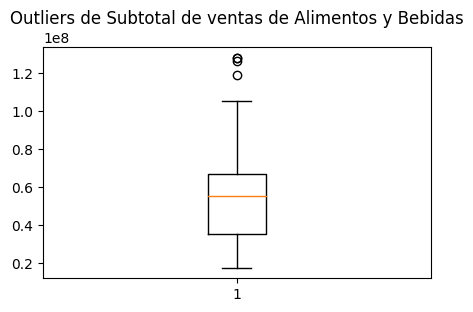

In [44]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["subtotal_ventas_alimentos_bebidas"]) 
plt.title("Outliers de Subtotal de ventas de Alimentos y Bebidas")
plt.show() #dibujamos el diagrama

In [45]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["subtotal_ventas_alimentos_bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 114548006.925
Limite inferior permitido -11790048.954999998


In [46]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [47]:

#Obtenemos datos limpios
data_clean_iqr4= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr4

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


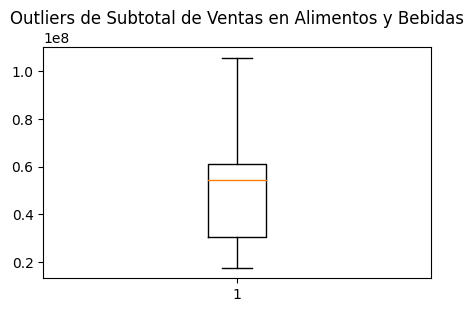

In [48]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr4["subtotal_ventas_alimentos_bebidas"]) 
plt.title("Outliers de Subtotal de Ventas en Alimentos y Bebidas")
plt.show() #dibujamos el diagrama

### bebidas

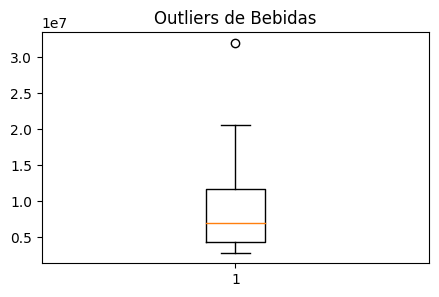

In [49]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["bebidas"]) 
plt.title("Outliers de Bebidas")
plt.show() #dibujamos el diagrama

In [50]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 22825184.4515
Limite inferior permitido -6724636.7525


In [51]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [52]:

#Obtenemos datos limpios
data_clean_iqr5= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr5

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,4.634783e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.089879e+07,1.191048e+07


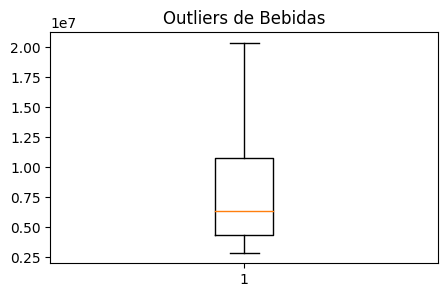

In [53]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr4["bebidas"]) 
plt.title("Outliers de Bebidas")
plt.show() #dibujamos el diagrama

### almacen

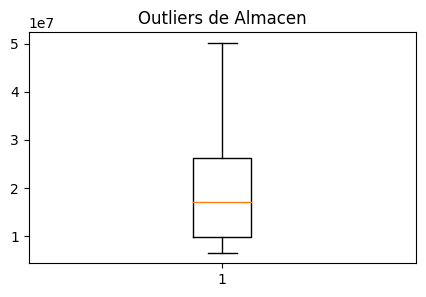

In [54]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["almacen"]) 
plt.title("Outliers de Almacen")
plt.show() #dibujamos el diagrama

### panaderia

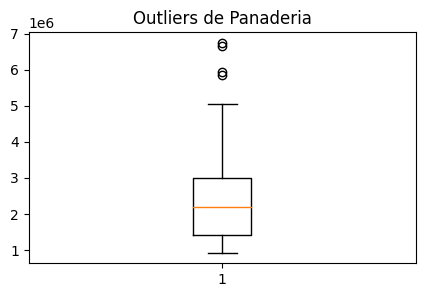

In [55]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["panaderia"]) 
plt.title("Outliers de Panaderia")
plt.show() #dibujamos el diagrama

In [56]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 5344003.4675
Limite inferior permitido -946571.9125000001


In [57]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [58]:
#Obtenemos datos limpios
data_clean_iqr6= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr6

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


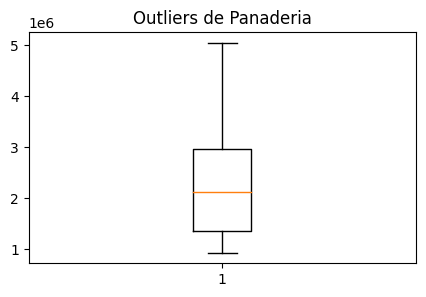

In [59]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr6["panaderia"]) 
plt.title("Outliers de Panaderia")
plt.show() #dibujamos el diagrama

### lacteos

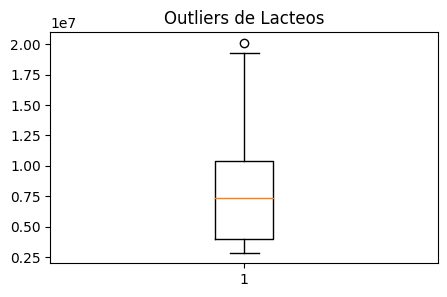

In [60]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["lacteos"]) 
plt.title("Outliers de Lacteos")
plt.show() #dibujamos el diagrama

In [61]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 19940661.0455
Limite inferior permitido -5569362.3025


In [62]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [63]:
#Obtenemos datos limpios
data_clean_iqr7= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr7

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,5.664003e+07,5.543219e+07,...,4.519991e+07,5.859939e+06,1.627522e+07,2.126505e+07,5.863701e+06,1.679029e+06,2.175394e+07,4.759533e+06,1.266927e+07,1.666512e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,4.634783e+06


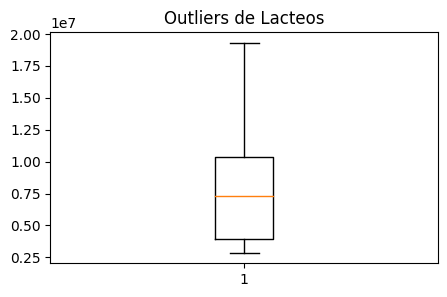

In [64]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr7["lacteos"]) 
plt.title("Outliers de Lacteos")
plt.show() #dibujamos el diagrama

### carnes

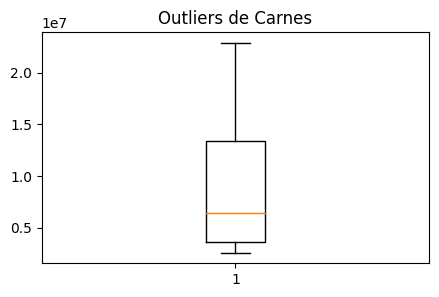

In [65]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["carnes"]) 
plt.title("Outliers de Carnes")
plt.show() #dibujamos el diagrama

### verduleria_fruteria




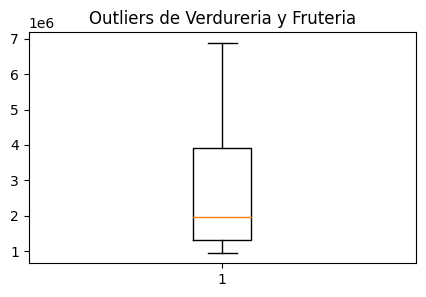

In [66]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["verduleria_fruteria"]) 
plt.title("Outliers de Verdureria y Fruteria")
plt.show() #dibujamos el diagrama

### alimentos_preparados_rotiseria

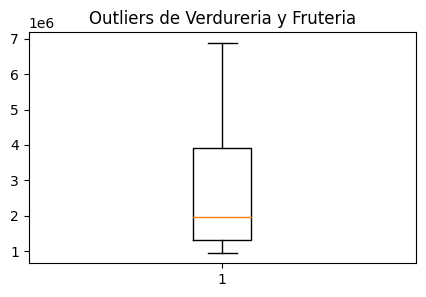

In [67]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["verduleria_fruteria"]) 
plt.title("Outliers de Verdureria y Fruteria")
plt.show() #dibujamos el diagrama

### articulos_limpieza_perfumeria 

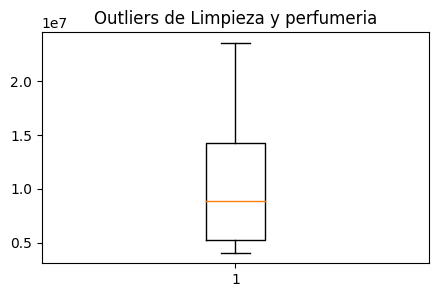

In [68]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["articulos_limpieza_perfumeria"]) 
plt.title("Outliers de Limpieza y perfumeria")
plt.show() #dibujamos el diagrama

### indumentaria_calzado_textiles_hogar

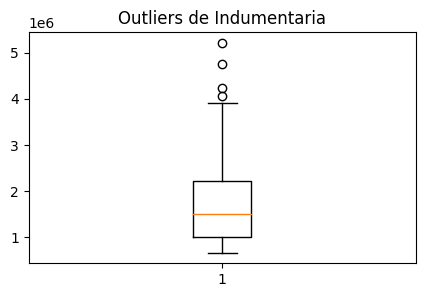

In [69]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de Indumentaria")
plt.show() #dibujamos el diagrama

In [70]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["indumentaria_calzado_textiles_hogar"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 4028365.028
Limite inferior permitido -800338.516


In [71]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [72]:
#Obtenemos datos limpios
data_clean_iqr8= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr8

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,3.782646e+06,9.189746e+06,1.330139e+07


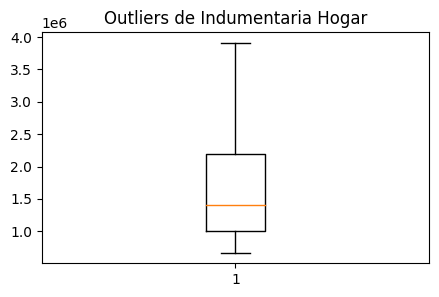

In [73]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr8["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de Indumentaria Hogar")
plt.show() #dibujamos el diagrama

### electronicos_articulos_hogar 

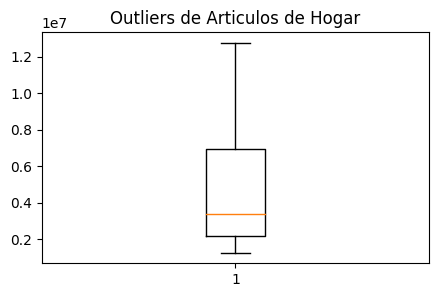

In [74]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["electronicos_articulos_hogar"]) 
plt.title("Outliers de Articulos de Hogar")
plt.show() #dibujamos el diagrama

### otros

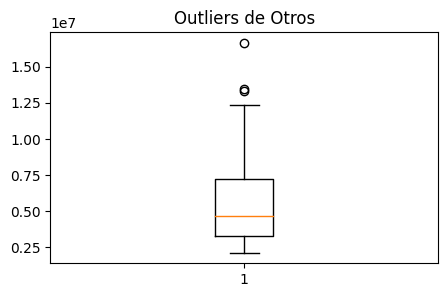

In [75]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["otros"]) 
plt.title("Outliers de Otros")
plt.show() #dibujamos el diagrama

In [76]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 13169100.024999999
Limite inferior permitido -2599893.999


In [77]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,10898787.99,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [78]:
#Obtenemos datos limpios
data_clean_iqr9= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr9

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,4.634783e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,1.089879e+07,1.191048e+07


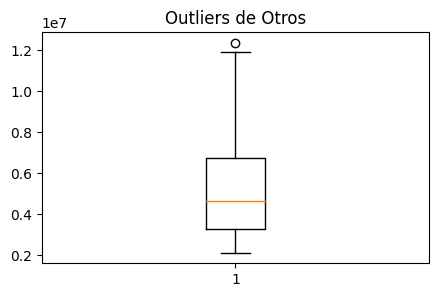

In [79]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr9["otros"]) 
plt.title("Outliers de Otros")
plt.show() #dibujamos el diagrama

In [80]:
data_clean1.to_csv("Datos_Ventas1.csv")
data_clean2.to_csv("Datos_Ventas2.csv")
data_clean_iqr1.to_csv("Datos_Ventas3.csv")
data_clean_iqr2.to_csv("Datos_Ventas4.csv")
data_clean_iqr3.to_csv("Datos_Ventas5.csv")
data_clean_iqr4.to_csv("Datos_Ventas6.csv")
data_clean_iqr5.to_csv("Datos_Ventas7.csv")
data_clean_iqr6.to_csv("Datos_Ventas8.csv")
data_clean_iqr7.to_csv("Datos_Ventas9.csv")
data_clean_iqr8.to_csv("Datos_Ventas10.csv")
data_clean_iqr9.to_csv("Datos_Ventas11.csv")

In [81]:
from google.colab import files  
files.download("Datos_Ventas1.csv")
files.download("Datos_Ventas2.csv")
files.download("Datos_Ventas3.csv")
files.download("Datos_Ventas4.csv")
files.download("Datos_Ventas5.csv")
files.download("Datos_Ventas6.csv")
files.download("Datos_Ventas7.csv")
files.download("Datos_Ventas8.csv")
files.download("Datos_Ventas9.csv")
files.download("Datos_Ventas10.csv")
files.download("Datos_Ventas11.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>